In [1]:
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from matplotlib.cbook import flatten

import numpy as np
import tensorflow as tf

In [2]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
train_dir = 'C:/aiproject/data/train'
test_dir = 'C:/aiproject/data/test'
validation_dir = 'C:/aiproject/data/validation'

train_books_dir = 'C:/aiproject/data/train/book'
train_clothing_dir = 'C:/aiproject/data/train/clothing'
train_electronics_dir = 'C:/aiproject/data/train/electronic'
train_furniture_dir = 'C:/aiproject/data/train/furniture'

test_books_dir = 'C:/aiproject/data/test/book'
test_clothing_dir = 'C:/aiproject/data/test/clothing'
test_electronics_dir = 'C:/aiproject/data/test/electronic'
test_furniture_dir = 'C:/aiproject/data/test/furniture'

val_books_dir = 'C:/aiproject/data/validation/book'
val_clothing_dir = 'C:/aiproject/data/validation/clothing'
val_electronics_dir = 'C:/aiproject/data/validation/electronic'
val_furniture_dir = 'C:/aiproject/data/validation/furniture'

In [4]:
print("훈련 책 데이터 수 : {}".format(len(os.listdir(train_books_dir))))
print("훈련 옷 데이터 수 : {}".format(len(os.listdir(train_clothing_dir))))
print("훈련 전자기기 데이터 수 : {}".format(len(os.listdir(train_electronics_dir))))
print("훈련 가구 데이터 수 : {}".format(len(os.listdir(train_furniture_dir))))

print("테스트 책 데이터 수 : {}".format(len(os.listdir(test_books_dir))))
print("테스트 옷 데이터 수 : {}".format(len(os.listdir(test_clothing_dir))))
print("테스트 전자기기 데이터 수 : {}".format(len(os.listdir(test_electronics_dir))))
print("테스트 가구 데이터 수 : {}".format(len(os.listdir(test_furniture_dir))))

print("검증 책 데이터 수 : {}".format(len(os.listdir(val_books_dir))))
print("검증 옷 데이터 수 : {}".format(len(os.listdir(val_clothing_dir))))
print("검증 전자기기 데이터 수 : {}".format(len(os.listdir(val_electronics_dir))))
print("검증 가구 데이터 수 : {}".format(len(os.listdir(val_furniture_dir))))

훈련 책 데이터 수 : 1993
훈련 옷 데이터 수 : 1378
훈련 전자기기 데이터 수 : 1785
훈련 가구 데이터 수 : 6026
테스트 책 데이터 수 : 152
테스트 옷 데이터 수 : 128
테스트 전자기기 데이터 수 : 240
테스트 가구 데이터 수 : 1744
검증 책 데이터 수 : 550
검증 옷 데이터 수 : 592
검증 전자기기 데이터 수 : 1002
검증 가구 데이터 수 : 1576


In [5]:
#스케일링
train_gen = ImageDataGenerator( rescale = 1./255)
val_gen = ImageDataGenerator( rescale = 1./255)
test_gen = ImageDataGenerator( rescale = 1./255)

In [6]:

train_generator = train_gen.flow_from_directory(train_dir,
                              target_size =(32,32),
                              batch_size=16,
                              class_mode = 'categorical')
val_generator = val_gen.flow_from_directory( validation_dir,
                            target_size = (32,32),
                            batch_size=16,
                            class_mode =  'categorical')
test_generator = test_gen.flow_from_directory( test_dir,
                            target_size = (32,32),
                            batch_size=16,
                            class_mode =  'categorical')

Found 11182 images belonging to 4 classes.
Found 3720 images belonging to 4 classes.
Found 2264 images belonging to 4 classes.


In [11]:
c_model = Sequential()

kernelsize = 3
filter = 32


# 입력층(CNN)
# 특징을 도드라지게 해준다
c_model.add(Conv2D(filters = filter, 
                   kernel_size = kernelsize, 
                   input_shape = (32,32,3), 
                   padding = 'same', 
                   activation = 'relu'))
#불필요한 부분 삭제
c_model.add(MaxPooling2D(pool_size = (2,2),strides=2))

c_model.add(Conv2D(filters = filter,
                   kernel_size = kernelsize, 
                   input_shape = (32,32,3), 
                   padding = 'same', 
                   activation = 'relu'))

c_model.add(MaxPooling2D(pool_size = (2,2),strides=2))

# 1차원으로 데이터 축소
c_model.add(Flatten())

#은닉층
c_model.add(Dense(units=128, activation = 'relu'))

#출력층
c_model.add(Dense(units=4, activation= 'softmax'))

c_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [12]:
c_model.compile(loss='categorical_crossentropy',
                optimizer = 'adam',
                metrics=['accuracy'])


In [14]:
c_history = c_model.fit_generator(train_generator,
            steps_per_epoch=150,
            epochs=50,
            validation_data = val_generator,
            validation_steps = 5)

Epoch 1/50
  4/150 [..............................] - ETA: 3s - loss: 1.3846 - accuracy: 0.5312

C:\Users\k2h2j3\AppData\Local\Temp/ipykernel_11308/1883484632.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  c_history = c_model.fit_generator(train_generator,


150/150 [==============================] - 4s 28ms/step - loss: 0.9588 - accuracy: 0.6212 - val_loss: 0.7102 - val_accuracy: 0.7125
Epoch 2/50
150/150 [==============================] - 4s 28ms/step - loss: 0.6874 - accuracy: 0.7275 - val_loss: 0.8254 - val_accuracy: 0.6250
Epoch 3/50
150/150 [==============================] - 4s 29ms/step - loss: 0.5777 - accuracy: 0.7754 - val_loss: 0.7677 - val_accuracy: 0.7000
Epoch 4/50
150/150 [==============================] - 4s 28ms/step - loss: 0.5193 - accuracy: 0.7986 - val_loss: 0.4750 - val_accuracy: 0.8875
Epoch 5/50
150/150 [==============================] - 4s 28ms/step - loss: 0.5060 - accuracy: 0.7962 - val_loss: 0.7206 - val_accuracy: 0.7375
Epoch 6/50
150/150 [==============================] - 4s 29ms/step - loss: 0.4440 - accuracy: 0.8242 - val_loss: 0.7138 - val_accuracy: 0.6875
Epoch 7/50
150/150 [==============================] - 4s 28ms/step - loss: 0.4347 - accuracy: 0.8353 - val_loss: 0.6499 - val_accuracy: 0.7250
Epoch 8/50

[]

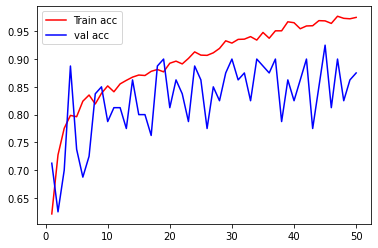

In [15]:
import matplotlib.pyplot as plt
acc = c_history.history['accuracy']
val_acc = c_history.history['val_accuracy']

epoch = range(1, len(acc)+1) #정확도의 개수

plt.plot(epoch, acc, c='red', label = 'Train acc') # 훈련 데이터 정확도
plt.plot(epoch, val_acc, c= 'blue', label = 'val acc') # 검증 데이터 정확도
plt.legend() #범례
plt.plot()

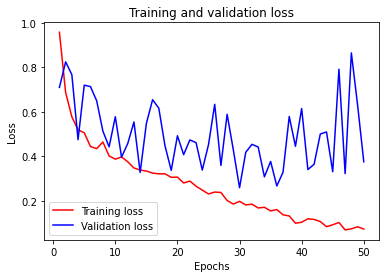

In [16]:
loss = c_history.history['loss']
val_loss = c_history.history['val_loss']

plt.plot(epoch, loss, 'red', label='Training loss')
plt.plot(epoch, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()